In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('2.1 3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
data_map = data.copy()
data_map['Language'] = data_map['Language'].map({'English':0, 'French':1, 'German':2})
data_map

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [4]:
x = data_map.iloc[:,1:3]
x 

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [15]:
k_means = KMeans(3)

In [16]:
k_means.fit(x)

KMeans(n_clusters=3)

In [17]:
identified_clusters = k_means.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [18]:
data_w_clusters = data_map.copy()
data_w_clusters['Cluster'] = identified_clusters
data_w_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


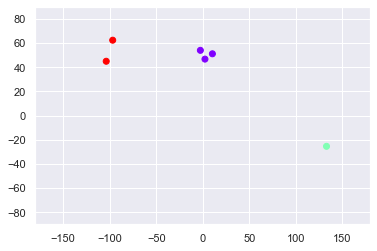

In [19]:
plt.scatter(data_w_clusters['Longitude'], data_w_clusters['Latitude'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

# Selecting the number of clusters

## WCSS

In [10]:
k_means.inertia_

13205.758119999999

In [11]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [12]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

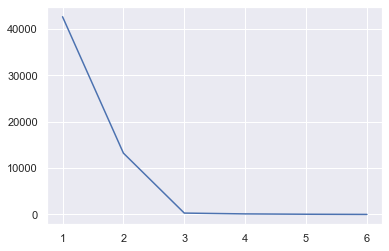

In [14]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.show()